In [1]:
import numpy as np
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import subplots, cm
from sklearn.metrics import accuracy_score


/Users/tingyu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [120]:
df = pd.read_csv('/Users/tingyu/Desktop/DATA5322/HW/Written Homework 2 SVM/Housing.csv')

In [121]:
# data explore

In [122]:
df.head()

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT
0,1371772,920.0,1,13,9990,9993,360,9993,75000,700000,...,1,0,1,14,52,6,1969,7,71,75000
1,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,1,83,22,6,1999,10,101,5600
2,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,2,106,22,6,1999,7,71,8000
3,1371774,22.5,1,13,600,9993,9993,9993,7000,800000,...,1,0,1,33,62,4,1959,6,63,7000
4,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,1,0,1,297,50,3,1971,7,71,16000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75388 entries, 0 to 75387
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SERIAL     75388 non-null  int64  
 1   DENSITY    75388 non-null  float64
 2   OWNERSHP   75388 non-null  int64  
 3   OWNERSHPD  75388 non-null  int64  
 4   COSTELEC   75388 non-null  int64  
 5   COSTGAS    75388 non-null  int64  
 6   COSTWATR   75388 non-null  int64  
 7   COSTFUEL   75388 non-null  int64  
 8   HHINCOME   75388 non-null  int64  
 9   VALUEH     75388 non-null  int64  
 10  ROOMS      75388 non-null  int64  
 11  BUILTYR2   75388 non-null  int64  
 12  BEDROOMS   75388 non-null  int64  
 13  VEHICLES   75388 non-null  int64  
 14  NFAMS      75388 non-null  int64  
 15  NCOUPLES   75388 non-null  int64  
 16  PERNUM     75388 non-null  int64  
 17  PERWT      75388 non-null  int64  
 18  AGE        75388 non-null  int64  
 19  MARST      75388 non-null  int64  
 20  BIRTHY

# data clean

In [124]:
(df['INCTOT'] == 9999999).sum()

12773

In [125]:
# Drop rows where 'OWNERSHP' is 0
df_clean = df[df['OWNERSHP'] != 0]
# Drop rows where 'ROOMS ' is 0
df_clean = df_clean[df_clean['ROOMS'] != 0]
# Drop rows where 'BEDROOMS' is 0
df_clean = df_clean[df_clean['BEDROOMS'] != 0]
# Drop rows where 'INCTOT' is 9999999
df_clean = df_clean[df_clean['INCTOT'] != 9999999]
# Drop rows where 'MARST' is 9
df_clean = df_clean[df_clean['MARST'] != 9]
# Drop rows where 'AGE' is 999
df_clean = df_clean[df_clean['AGE'] != 999]
# Drop rows where 'EDUC' is 99
df_clean = df_clean[df_clean['EDUC'] != 99]

In [126]:
(df_clean['INCTOT'] == 9999999).sum()

0

In [127]:
df_clean[df_clean['INCTOT'] == 9999999]

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT


In [128]:
df_clean[df_clean['AGE']<10]

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT


In [129]:
# Group by 'SERIAL' and find the index of the max 'INCTOT' for each group
idx = df_clean.groupby('SERIAL')['INCTOT'].idxmax()
# Use the index to filter the DataFrame to keep only rows with the highest 'INCTOT' per 'SERIAL'
df_clean = df_clean.loc[idx]
# Check for duplicates in the 'SERIAL' column
duplicates = df_clean['SERIAL'].duplicated()

# Print the duplicate values
duplicates.any()

False

In [130]:
df_clean[df_clean['AGE']<10]

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75388 entries, 0 to 75387
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SERIAL     75388 non-null  int64  
 1   DENSITY    75388 non-null  float64
 2   OWNERSHP   75388 non-null  int64  
 3   OWNERSHPD  75388 non-null  int64  
 4   COSTELEC   75388 non-null  int64  
 5   COSTGAS    75388 non-null  int64  
 6   COSTWATR   75388 non-null  int64  
 7   COSTFUEL   75388 non-null  int64  
 8   HHINCOME   75388 non-null  int64  
 9   VALUEH     75388 non-null  int64  
 10  ROOMS      75388 non-null  int64  
 11  BUILTYR2   75388 non-null  int64  
 12  BEDROOMS   75388 non-null  int64  
 13  VEHICLES   75388 non-null  int64  
 14  NFAMS      75388 non-null  int64  
 15  NCOUPLES   75388 non-null  int64  
 16  PERNUM     75388 non-null  int64  
 17  PERWT      75388 non-null  int64  
 18  AGE        75388 non-null  int64  
 19  MARST      75388 non-null  int64  
 20  BIRTHY

In [131]:
import pandas as pd
# Define the mapping dictionary for marital status
marital_map = {
    1: 'Married',  # Married, spouse present
    2: 'Married',  # Married, spouse absent
    3: 'Single',   # Separated
    4: 'Single',   # Divorced
    5: 'Single',   # Widowed
    6: 'Single',   # Never married/single
}

# Apply the mapping to the MARST column to create a new 'MaritalStatus' column
df_clean['MaritalStatus'] = df_clean['MARST'].map(marital_map)

# Create dummy variables for the 'MaritalStatus' column
df_clean_dummies = pd.get_dummies(df_clean['MaritalStatus'])

# Now, you can concatenate these dummy variables back to the original DataFrame
df_clean = pd.concat([df_clean, df_clean_dummies], axis=1)

# Show the first few rows of the DataFrame to confirm the changes
df_clean.head()



,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT,MaritalStatus,Married,Single
0,1371772,920.0,1,13,9990,9993,360,9993,75000,700000,...,14,52,6,1969,7,71,75000,Single,0,1
2,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,106,22,6,1999,7,71,8000,Single,0,1
3,1371774,22.5,1,13,600,9993,9993,9993,7000,800000,...,33,62,4,1959,6,63,7000,Single,0,1
5,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,287,18,6,2003,6,61,34500,Single,0,1
7,1371776,448.2,1,12,1560,3000,9993,9993,155300,850000,...,10,93,1,1928,10,101,89800,Married,1,0


In [132]:
df_clean[df_clean['AGE']<10]

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT,MaritalStatus,Married,Single


In [110]:
# Define the mapping dictionary
# marital_map = {
#     1: 'Married',  # Married, spouse present
#     2: 'Married',  # Married, spouse absent
#     3: 'Single',  # Separated
#     4: 'Single',  # Divorced
#     5: 'Single',  # Widowed
#     6: 'Single',  # Never married/single
# }

# # Apply the mapping to the MARST column
# df_clean['MARST'] = df_clean['MARST'].map(marital_map)

# df_clean = pd.get_dummies(df_clean, columns=['MARST'])

In [133]:
# Define the mapping dictionary for marital status
education_map = {
    0: 'no_college', 
    1: 'no_college',  
    2: 'no_college', 
    3: 'no_college',  
    4: 'no_college',  
    5: 'no_college',  
    6: 'no_college',
    7: 'college',
    8: 'college',
    9: 'college',
    10: 'college',
    11: 'college',
}

# Apply the mapping to the 'EDUC' column to create a new 'EducationStatus' column
df_clean['EducationStatus'] = df_clean['EDUC'].map(education_map)

# Create dummy variables for the 'EducationStatus' column
df_clean_dummies = pd.get_dummies(df_clean['EducationStatus'])

# Now, you can concatenate these dummy variables back to the original DataFrame
df_clean = pd.concat([df_clean, df_clean_dummies], axis=1)

# Optionally, drop the original 'EDUC' column if you no longer need it
# df_clean = df_clean.drop('EDUC', axis=1)

# Show the first few rows of the DataFrame to confirm the changes
df_clean.head()

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,BIRTHYR,EDUC,EDUCD,INCTOT,MaritalStatus,Married,Single,EducationStatus,college,no_college
0,1371772,920.0,1,13,9990,9993,360,9993,75000,700000,...,1969,7,71,75000,Single,0,1,college,1,0
2,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,1999,7,71,8000,Single,0,1,college,1,0
3,1371774,22.5,1,13,600,9993,9993,9993,7000,800000,...,1959,6,63,7000,Single,0,1,no_college,0,1
5,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,2003,6,61,34500,Single,0,1,no_college,0,1
7,1371776,448.2,1,12,1560,3000,9993,9993,155300,850000,...,1928,10,101,89800,Married,1,0,college,1,0


In [112]:
# Define the mapping dictionary
marital_map = {
    0: 'no_college', 
    1: 'no_college',  
    2: 'no_college', 
    3: 'no_college',  
    4: 'no_college',  
    5: 'no_college',  
    6: 'no_college',
    7: 'college',
    8: 'college',
    9: 'college',
    10: 'college',
    11: 'college',
}

# Apply the mapping to the MARST column
df_clean['EDUC'] = df_clean['EDUC'].map(marital_map)

df_clean = pd.get_dummies(df_clean, columns=['EDUC'])

In [134]:
df_clean[df_clean['AGE']<10]

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,BIRTHYR,EDUC,EDUCD,INCTOT,MaritalStatus,Married,Single,EducationStatus,college,no_college


In [135]:
df_clean.shape

(30802, 30)

In [136]:
df_clean = df_clean.sample(n=5000, random_state=42) 

In [137]:
df_clean[df_clean['AGE']<10]

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,BIRTHYR,EDUC,EDUCD,INCTOT,MaritalStatus,Married,Single,EducationStatus,college,no_college


In [138]:
df_clean.shape

(5000, 30)

In [139]:
df_clean[df_clean['AGE']<10]

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,BIRTHYR,EDUC,EDUCD,INCTOT,MaritalStatus,Married,Single,EducationStatus,college,no_college


In [140]:
df_clean[df_clean['AGE']<10]

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,BIRTHYR,EDUC,EDUCD,INCTOT,MaritalStatus,Married,Single,EducationStatus,college,no_college


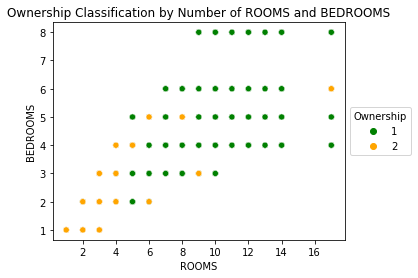

In [118]:
df['OwnershipStatus'] = df['OWNERSHP'].map({1: 'owned', 2: 'rented'})
palette_colors = {1: "green", 2: "orange"}
sns.scatterplot(x='ROOMS', y='BEDROOMS', hue='OWNERSHP', data=df, palette=palette_colors)
plt.title('Ownership Classification by Number of ROOMS and BEDROOMS')
plt.xlabel('ROOMS')
plt.ylabel('BEDROOMS')
plt.subplots_adjust(right=0.8)  
plt.legend(title='Ownership', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
# linear ROOMS/BEDROOMS

In [21]:
#split data into train and test

In [22]:
X = df_clean[['ROOMS', 'BEDROOMS']] # feature
y= df_clean['OWNERSHP'] # target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X
                                                 ,y
                                                 ,train_size = 0.7
                                                 ,random_state = 1)

In [23]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
#u
kfold = skm.KFold(5,  
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 0.01}

In [25]:
grid.cv_results_[('mean_test_score')]

array([0.8006, 0.8116, 0.792 , 0.787 , 0.8026, 0.7862])

In [26]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
print(confusion_table(y_test_hat, y_test))
accuracy = accuracy_score(y_test, y_test_hat)
print("Accuracy:", accuracy)

Truth        1    2
Predicted          
1          972  154
2          104  270
Accuracy: 0.828


In [27]:
svm_linear = SVC(C=0.01,kernel='linear')
svm_linear.fit(X_train, y_train)
num_support_vectors = len(svm_linear.support_)
num_support_vectors

1776

/Users/tingyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


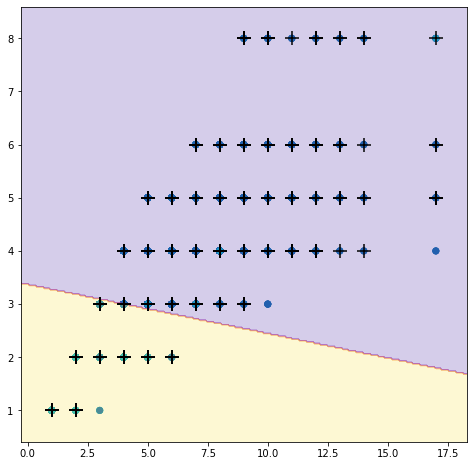

In [28]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear,
         ax=ax)

In [29]:
# RBF

In [146]:
X = df_clean[['AGE','Married','Single']] # feature
y= df_clean['OWNERSHP'] # target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X
                                                 ,y
                                                 ,train_size = 0.7
                                                 ,random_state = 1)

In [147]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [148]:
kfold = skm.KFold(5,  
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.01,0.1,1,5,10], 'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

In [149]:
grid.cv_results_[('mean_test_score')]

array([0.69914286, 0.69914286, 0.69914286, 0.69914286, 0.69914286,
       0.74257143, 0.73914286, 0.72314286, 0.72257143, 0.71857143,
       0.74685714, 0.74257143, 0.74057143, 0.74057143, 0.74057143,
       0.74028571, 0.74      , 0.74057143, 0.74057143, 0.74057143,
       0.74057143, 0.74      , 0.74057143, 0.74057143, 0.74057143])

In [152]:
# Assuming grid is your GridSearchCV object after fitting
cv_results = grid.cv_results_
# Create a DataFrame from the cv_results
results_df = pd.DataFrame(cv_results)

# Filter the DataFrame to show only the relevant columns
filtered_results = results_df[['param_C', 'param_gamma', 'mean_test_score']]

# Print the results
print(filtered_results)

   param_C param_gamma  mean_test_score
0     0.01         0.5         0.699143
1     0.01           1         0.699143
2     0.01           2         0.699143
3     0.01           3         0.699143
4     0.01           4         0.699143
5      0.1         0.5         0.742571
6      0.1           1         0.739143
7      0.1           2         0.723143
8      0.1           3         0.722571
9      0.1           4         0.718571
10       1         0.5         0.746857
11       1           1         0.742571
12       1           2         0.740571
13       1           3         0.740571
14       1           4         0.740571
15       5         0.5         0.740286
16       5           1         0.740000
17       5           2         0.740571
18       5           3         0.740571
19       5           4         0.740571
20      10         0.5         0.740571
21      10           1         0.740000
22      10           2         0.740571
23      10           3         0.740571


In [153]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
print(confusion_table(y_test_hat, y_test))
accuracy = accuracy_score(y_test, y_test_hat)
print("Accuracy:", accuracy)

Truth        1    2
Predicted          
1          976  262
2          100  162
Accuracy: 0.7586666666666667


In [154]:
svm_rbf = SVC(C=1, gamma=0.5,kernel='rbf')
svm_rbf.fit(X_train, y_train)
num_support_vectors = len(svm_rbf.support_)
num_support_vectors

1829

/Users/tingyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


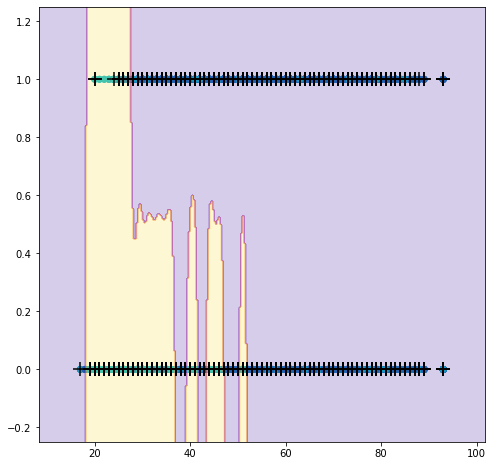

In [155]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_rbf,
         ax=ax)

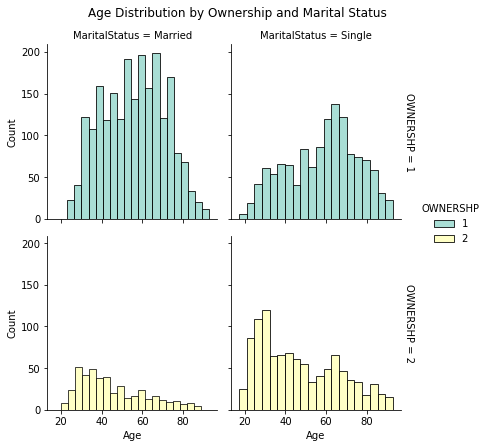

In [156]:
# Create histograms for different groups
g = sns.FacetGrid(df_clean, row='OWNERSHP', col='MaritalStatus', hue='OWNERSHP', palette='Set3', margin_titles=True)
g.map(sns.histplot, 'AGE', bins=20, kde=False)
g.add_legend()
g.set_axis_labels('Age', 'Count')
g.fig.suptitle('Age Distribution by Ownership and Marital Status', y=1.03)
plt.show()

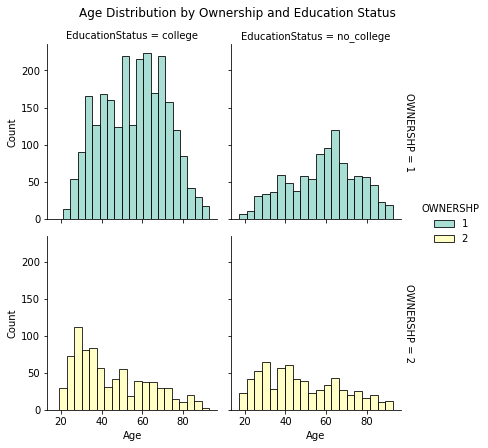

In [157]:
# Create histograms for different groups
g = sns.FacetGrid(df_clean, row='OWNERSHP', col='EducationStatus', hue='OWNERSHP', palette='Set3', margin_titles=True)
g.map(sns.histplot, 'AGE', bins=20, kde=False)
g.add_legend()
g.set_axis_labels('Age', 'Count')
g.fig.suptitle('Age Distribution by Ownership and Education Status', y=1.03)
plt.show()

In [158]:
df_clean[df_clean['AGE']<10]

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,BIRTHYR,EDUC,EDUCD,INCTOT,MaritalStatus,Married,Single,EducationStatus,college,no_college


In [159]:
#poly

In [160]:
X = df_clean[['AGE','college','no_college']] # feature
y= df_clean['OWNERSHP'] # target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X
                                                 ,y
                                                 ,train_size = 0.7
                                                 ,random_state = 1)

In [161]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [162]:
kfold = skm.KFold(5,  
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_poly,
                        {'C':[0.01,0.1,1,5,10], 'degree':[1,2,3]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.01, 'degree': 1}

In [163]:
grid.cv_results_[('mean_test_score')]

array([0.69914286, 0.69914286, 0.69914286, 0.69914286, 0.69914286,
       0.69914286, 0.69914286, 0.69914286, 0.69914286, 0.69914286,
       0.69914286, 0.69914286, 0.69914286, 0.69914286, 0.69914286])

In [164]:
# Assuming grid is your GridSearchCV object after fitting
cv_results = grid.cv_results_
# Create a DataFrame from the cv_results
results_df = pd.DataFrame(cv_results)
# Filter the DataFrame to show only the relevant columns
filtered_results = results_df[['param_C', 'param_degree', 'mean_test_score']]
# Print the results
print(filtered_results)

   param_C param_degree  mean_test_score
0     0.01            1         0.699143
1     0.01            2         0.699143
2     0.01            3         0.699143
3      0.1            1         0.699143
4      0.1            2         0.699143
5      0.1            3         0.699143
6        1            1         0.699143
7        1            2         0.699143
8        1            3         0.699143
9        5            1         0.699143
10       5            2         0.699143
11       5            3         0.699143
12      10            1         0.699143
13      10            2         0.699143
14      10            3         0.699143


In [165]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
print(confusion_table(y_test_hat, y_test))
accuracy = accuracy_score(y_test, y_test_hat)
print("Accuracy:", accuracy)

Truth         1    2
Predicted           
1          1076  424
2             0    0
Accuracy: 0.7173333333333334


In [166]:
svm_poly = SVC(C=0.01, degree=1,kernel='poly')
svm_poly.fit(X_train, y_train)
num_support_vectors = len(svm_poly.support_)
num_support_vectors

2106

/Users/tingyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


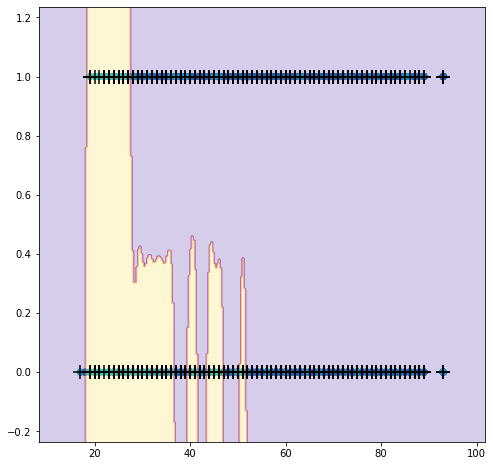

In [167]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_rbf,
         ax=ax)

In [168]:
df_clean[df_clean['AGE']<10]

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,BIRTHYR,EDUC,EDUCD,INCTOT,MaritalStatus,Married,Single,EducationStatus,college,no_college
